In [96]:
import pandas as pd
import json
import requests

from itertools import groupby
import matplotlib.pylab as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Analyzing jGit

In [126]:
IP = 'http://129.125.5.170'
PORT = '8080'
COMMIT_STATS_API_URL = '/GitHubCommitStatsRest/webresources/commitstatsfiles/repo/'
REQUEST_URL = IP  + ':' + PORT + COMMIT_STATS_API_URL
REPO_ID = '1553790'

In [127]:
def get_date(date):
    return pd.Timestamp(date).date()

def get_min_date(commitStatsFiles):
    return get_date(commitStatsFiles[0].get('commitDate'))

def get_max_date(commitStatsFiles):
    return get_date(commitStatsFiles[len(commitStatsFiles) - 1].get('commitDate'))

def getCommitStatsFilesList(commitStatsFiles):
    commitStatsFilesList = []
    for item in commitStatsFiles:
        csf = CommitStatsFile(item.get('fileName'), item.get('additions'), item.get('deletions'), item.get('changes'), item.get('status'), item.get('commitDate'))
        commitStatsFilesList.append(csf)
    return commitStatsFilesList

def get_date_range_index(min_project_date, max_project_date):
    return pd.date_range(start=min_project_date, end=max_project_date, freq='D')

def endswith(file_name, suffix):
    return file_name.lower().endswith((suffix))

class CommitStatsFile:
    def __init__(self, fileName, additions, deletions, changes, status, commitDate):
        self.fileName = fileName
        self.additions = additions
        self.deletions = deletions
        self.changes = changes
        self.status = status
        self.commitDate = commitDate

In [128]:
response = requests.get(REQUEST_URL + REPO_ID)
json_data = json.loads(response.text)

In [129]:
commitStatsFiles = json_data['commitStatsFiles']
commitStatsFilesList = getCommitStatsFilesList(commitStatsFiles)

In [130]:
min_project_date = get_min_date(commitStatsFiles)
max_project_date = get_max_date(commitStatsFiles)

In [131]:
date_range_index = get_date_range_index(min_project_date, max_project_date)
df = pd.DataFrame(index=date_range_index)
groups = groupby(commitStatsFilesList, lambda csf: (get_date(csf.commitDate)))

In [132]:
added = pd.Series(index=date_range_index)
modified = pd.Series(index=date_range_index)
removed = pd.Series(index=date_range_index)
renamed = pd.Series(index=date_range_index)

additions = pd.Series(index=date_range_index)
deletions = pd.Series(index=date_range_index)
changes = pd.Series(index=date_range_index,data=0)

In [133]:
for key, group in groups:
    grp = list(group)
    
    added[key] = 0
    modified[key] = 0
    removed[key] = 0
    renamed[key] = 0
    
    additions[key] = 0
    deletions[key] = 0
    changes[key] = 0
    
    for item in grp:
        if (endswith(item.fileName, '.java')):
            if(item.status == 'added'):
                added[key] += 1
            elif(item.status == 'modified'):
                modified[key] += float(item.changes)
                
                additions[key] += float(item.additions)
                deletions[key] += float(item.deletions)
                changes[key] += float(item.changes)
                
            elif(item.status == 'removed'):
                removed[key] += float(item.deletions)
            elif(item.status == 'renamed'):
                renamed[key] += float(item.changes)
                
                #additions += float(item.additions)
                #deletions += float(item.deletions)
                #changes += float(item.changes)

In [145]:
df['added'] = added
df['additions'] = additions
df['deletions'] = deletions
df['changes'] = changes

df['modified'] = modified
df['removed'] = removed
df['renamed'] = renamed

In [146]:
df.fillna(0, inplace=True)

In [158]:
df2 = df[['added','changes']]
df3=df2.rolling(window=30,center=False).sum()
df4=df3.rolling(window=90,center=False).mean()
df5=df3.rolling(window=90,center=False).sum()


In [159]:
def draw_secondary_log_axis(df, secondary_column):
    ax = df.plot(secondary_y=secondary_column,figsize=(15,10))
    ax2 = ax.twinx()
    ax2.set_yscale('log')
    plt.show()


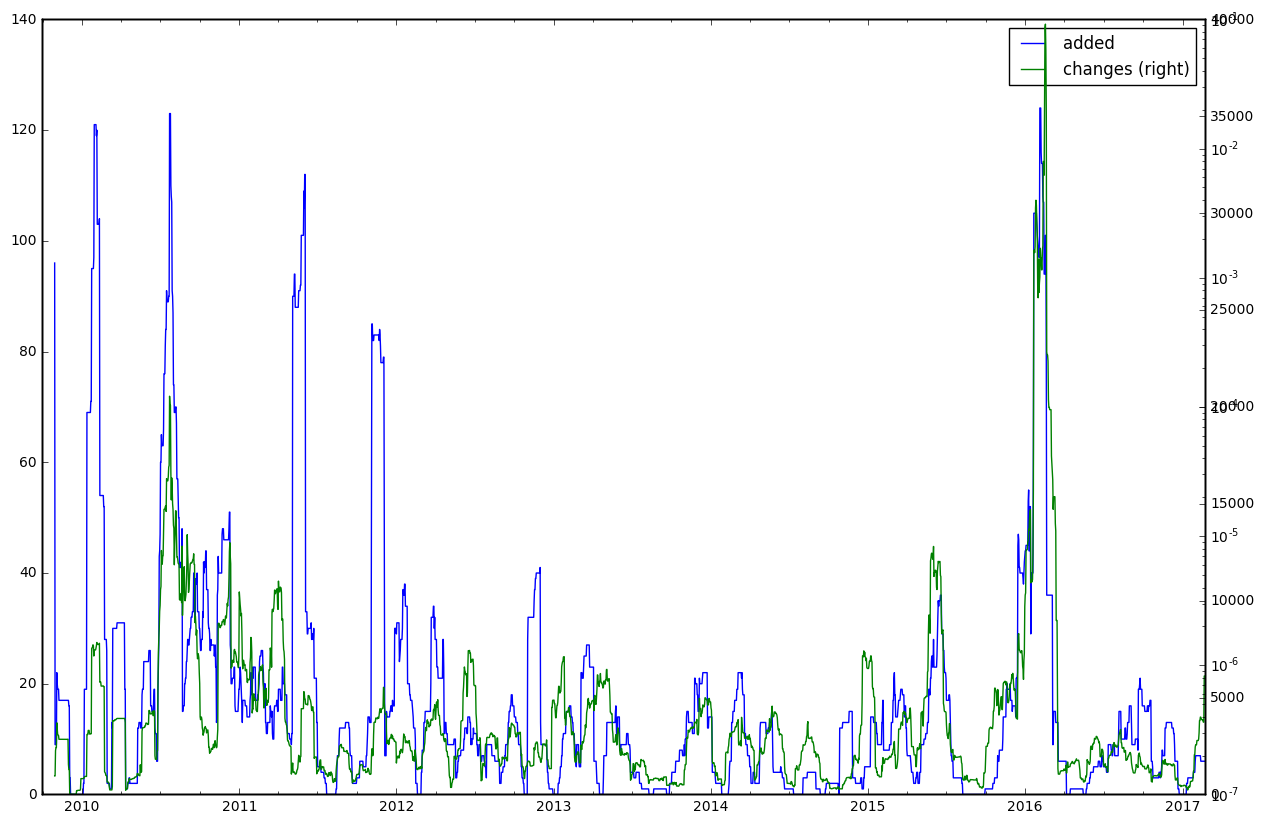

In [149]:
draw_secondary_log_axis(df3, 'changes')

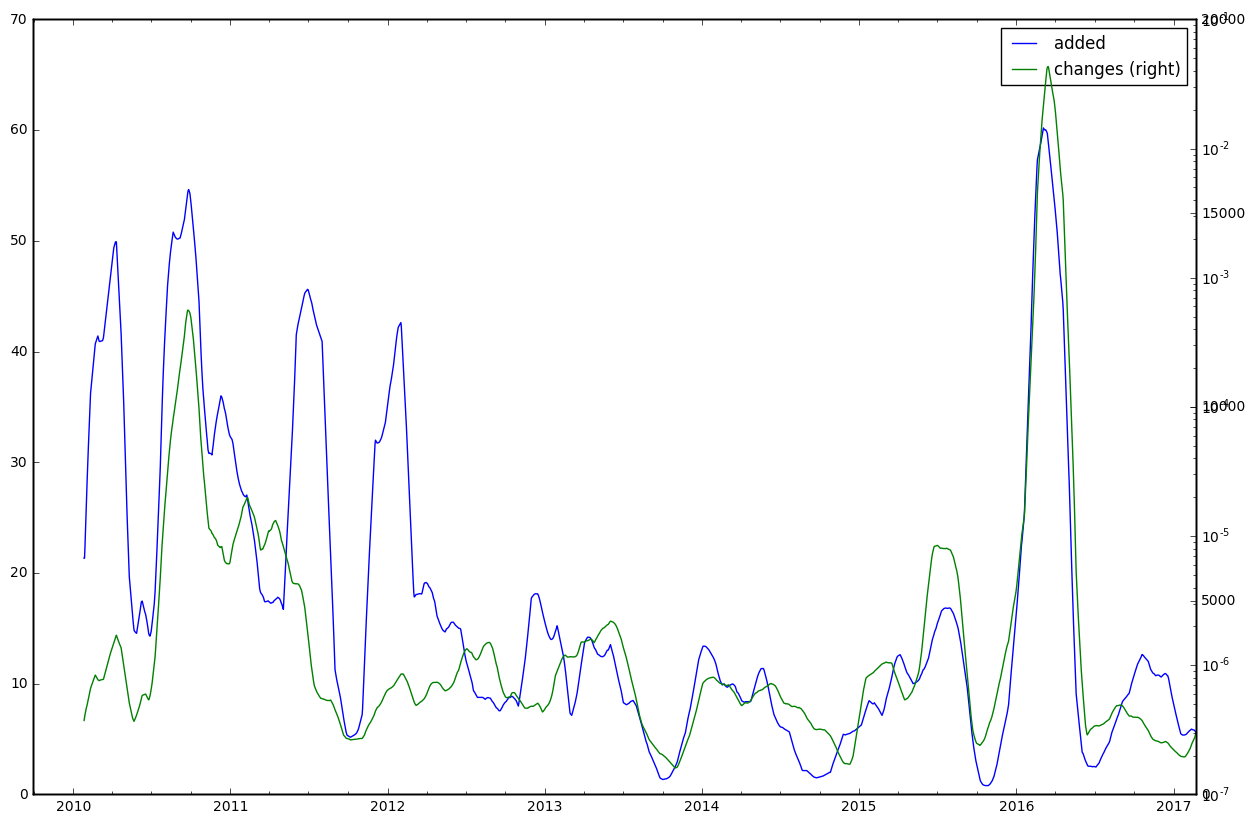

In [150]:
draw_secondary_log_axis(df4, 'changes')

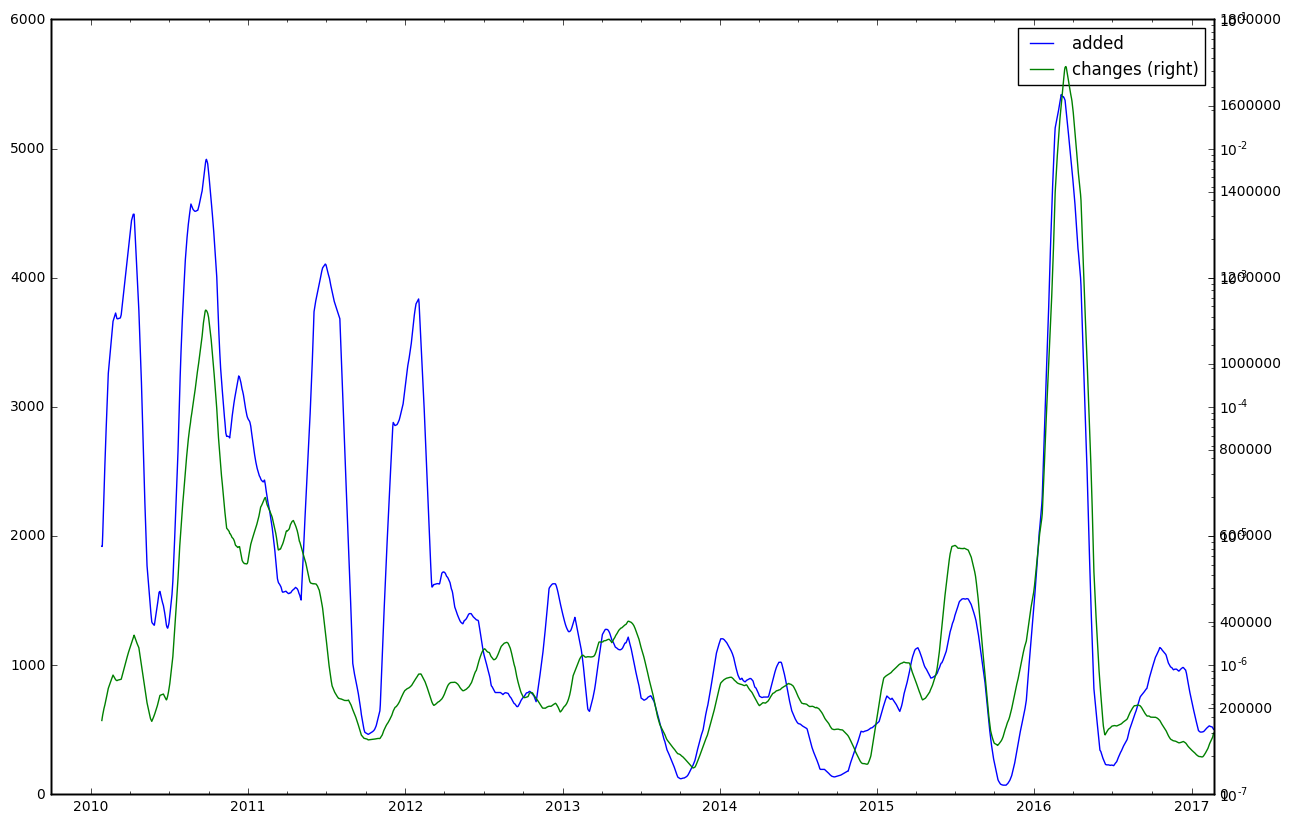

In [161]:
draw_secondary_log_axis(df5, 'changes')

In [171]:
effort = df4['changes'] / (df4['added'] + 1)

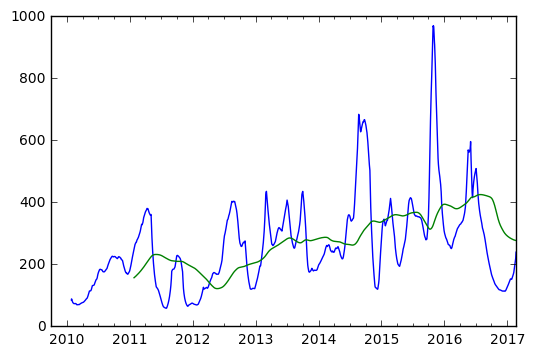

In [172]:
effort.plot()
effort.rolling(window=365,center=False).mean().plot()

# Sprint ROO

In [107]:
REPO_ID = '2304277'


In [110]:
response = requests.get(REQUEST_URL + REPO_ID)
json_data = json.loads(response.text)
commitStatsFiles = json_data['commitStatsFiles']
commitStatsFilesList = getCommitStatsFilesList(commitStatsFiles)
min_project_date = get_min_date(commitStatsFiles)
max_project_date = get_max_date(commitStatsFiles)
date_range_index = get_date_range_index(min_project_date, max_project_date)
dfroo = pd.DataFrame(index=date_range_index)
groups = groupby(commitStatsFilesList, lambda csf: (get_date(csf.commitDate)))
added = pd.Series(index=date_range_index)
modified = pd.Series(index=date_range_index)
removed = pd.Series(index=date_range_index)
renamed = pd.Series(index=date_range_index)

additions = pd.Series(index=date_range_index)
deletions = pd.Series(index=date_range_index)
changes = pd.Series(index=date_range_index,data=0)

for key, group in groups:
    grp = list(group)
    
    added[key] = 0
    modified[key] = 0
    removed[key] = 0
    renamed[key] = 0
    
    additions[key] = 0
    deletions[key] = 0
    changes[key] = 0
    
    for item in grp:
        if (endswith(item.fileName, '.java')):
            if(item.status == 'added'):
                added[key] += 1
            elif(item.status == 'modified'):
                modified[key] += float(item.changes)
                
                additions[key] += float(item.additions)
                deletions[key] += float(item.deletions)
                changes[key] += float(item.changes)
                
            elif(item.status == 'removed'):
                removed[key] += float(item.deletions)
            elif(item.status == 'renamed'):
                renamed[key] += float(item.changes)
                
                #additions += float(item.additions)
                #deletions += float(item.deletions)
                #changes += float(item.changes)
dfroo = pd.DataFrame(index=date_range_index)

dfroo['added'] = added
dfroo['additions'] = additions
dfroo['deletions'] = deletions
dfroo['changes'] = changes

dfroo['modified'] = modified
dfroo['removed'] = removed
dfroo['renamed'] = renamed

dfroo.fillna(0, inplace=True)

dfroo2 = dfroo[['added','changes']]
dfroo3=dfroo2.rolling(window=30,center=False).sum()
dfroo4=dfroo3.rolling(window=30,center=False).mean()

           

NameError: name 'dfroo' is not defined

In [116]:
dfroo = pd.DataFrame(index=date_range_index)

dfroo['added'] = added
dfroo['additions'] = additions
dfroo['deletions'] = deletions
dfroo['changes'] = changes

dfroo['modified'] = modified
dfroo['removed'] = removed
dfroo['renamed'] = renamed

dfroo.fillna(0, inplace=True)

dfroo2 = dfroo[['added','changes']]
dfroo3=dfroo2.rolling(window=30,center=False).sum()
dfroo4=dfroo3.rolling(window=90,center=False).mean()

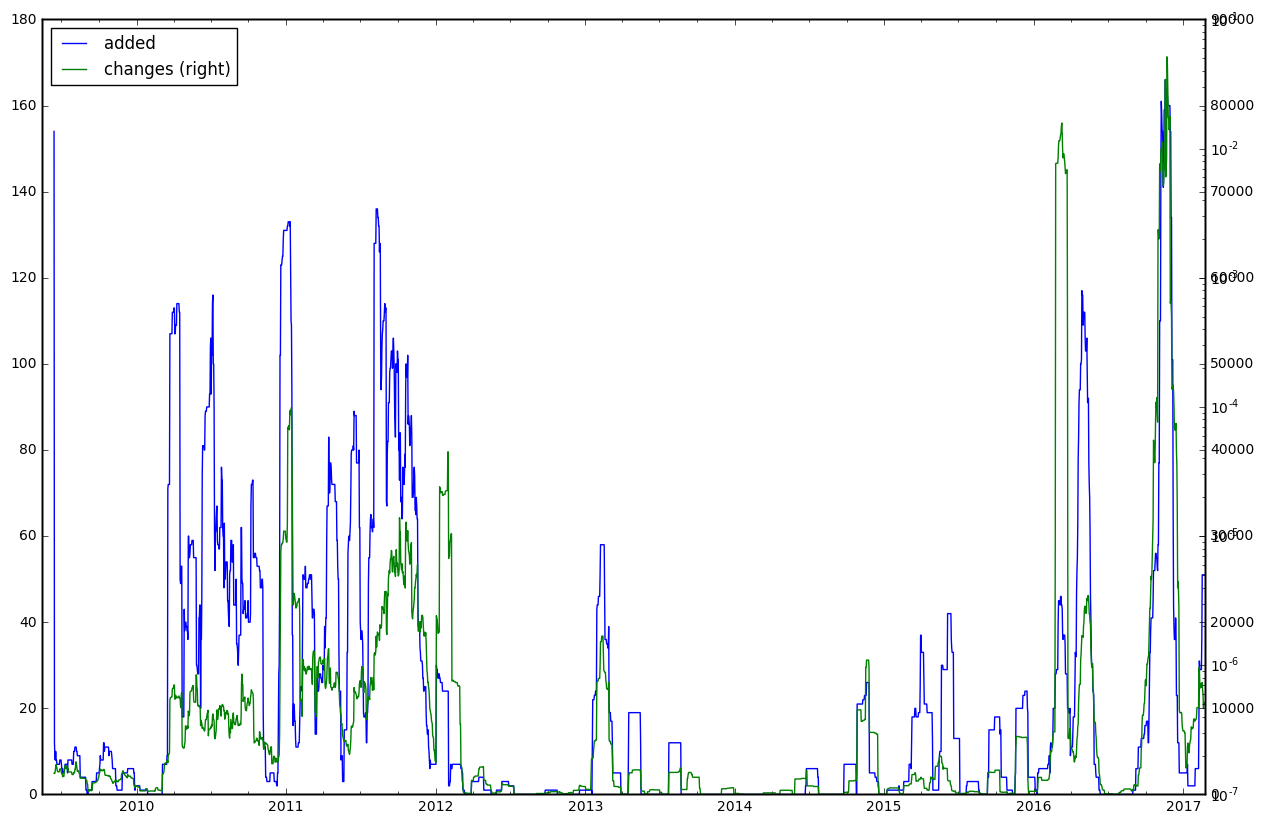

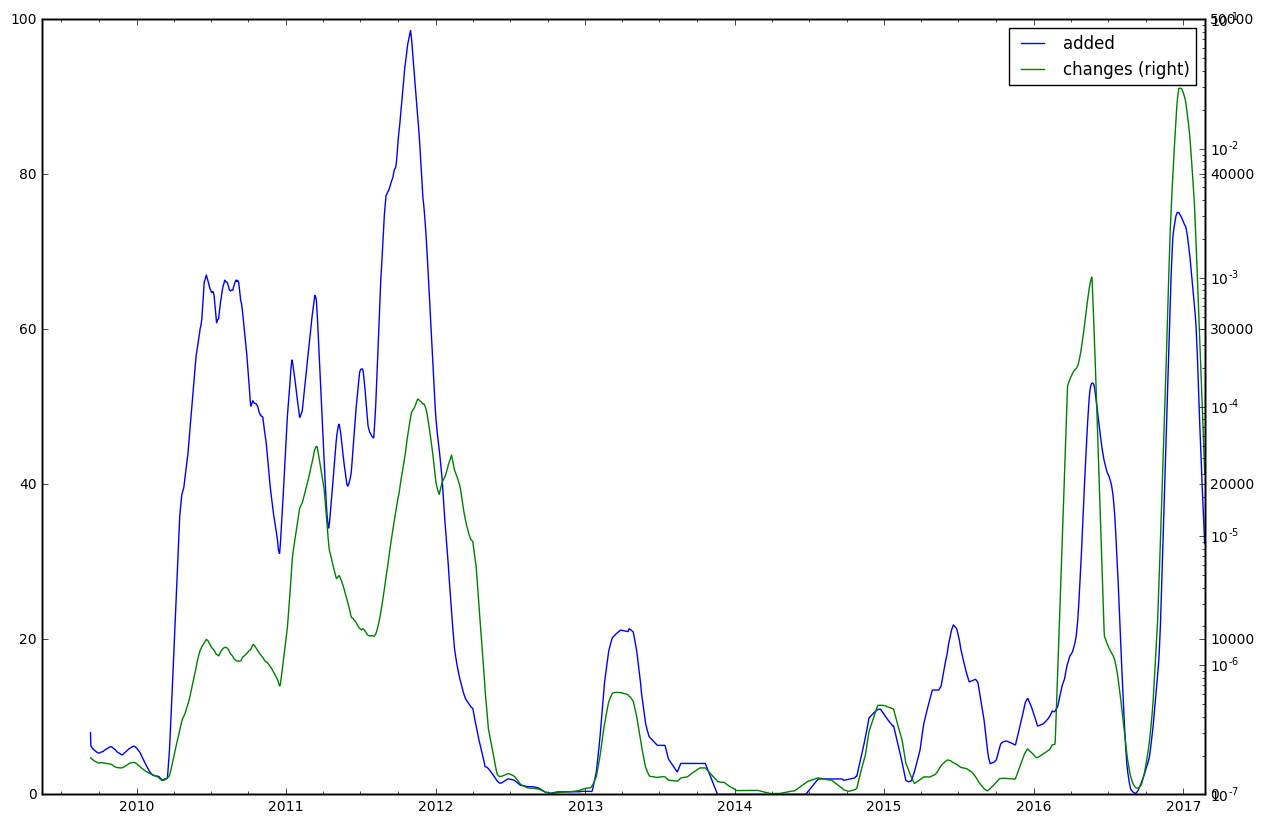

In [117]:
draw_secondary_log_axis(dfroo3, 'changes')
draw_secondary_log_axis(dfroo4, 'changes')


In [169]:
effortroo = dfroo4['changes'] / (dfroo4['added'] + 1)

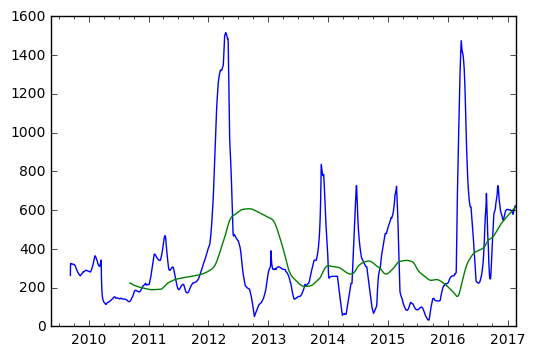

In [170]:
effortroo.plot()
effortroo.rolling(window=365,center=False).mean().plot()